Optimal solution for radios (x1): 40.00
Optimal solution for TVs (x2): 60.00
Maximum profit: ₹217480.00


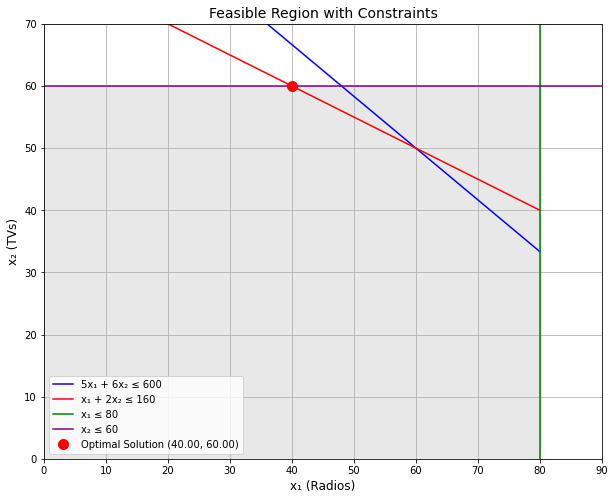

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Objective function (profit function to maximize)
def profit(x):
    x1, x2 = x
    return -(1300*x1 - 5.1*x1**2 + 3500*x2 - 10.1*x2**2)

# Constraints
constraints = [
    {'type': 'ineq', 'fun': lambda x: 80 - x[0]},         # x1 <= 80
    {'type': 'ineq', 'fun': lambda x: 60 - x[1]},         # x2 <= 60
    {'type': 'ineq', 'fun': lambda x: 600 - (5*x[0] + 6*x[1])},  # 5x1 + 6x2 <= 600 (components)
    {'type': 'ineq', 'fun': lambda x: 160 - (x[0] + 2*x[1])},    # x1 + 2x2 <= 160 (labor)
    {'type': 'ineq', 'fun': lambda x: x[0]},              # x1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]}               # x2 >= 0
]

# Initial guess for x1 and x2
x0 = [50, 50]

# Solve the problem using 'SLSQP' (Sequential Least Squares Programming)
result = minimize(profit, x0, constraints=constraints, method='SLSQP')

# Get the optimized values for x1 and x2, and the maximum profit
x_opt = result.x
max_profit = -result.fun

# Print the results
print(f"Optimal solution for radios (x1): {x_opt[0]:.2f}")
print(f"Optimal solution for TVs (x2): {x_opt[1]:.2f}")
print(f"Maximum profit: ₹{max_profit:.2f}")

# Now, let's visualize the feasible region and the optimal solution

# Define the constraints
x1_vals = np.linspace(0, 80, 400)
x2_vals = np.linspace(0, 60, 400)

# Create a meshgrid for x1 and x2
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Constraint 1: 5x1 + 6x2 <= 600 (components)
comp_constraint = (5*X1 + 6*X2 <= 600)

# Constraint 2: x1 + 2x2 <= 160 (labor)
labor_constraint = (X1 + 2*X2 <= 160)

# Feasible area (satisfying all constraints)
feasible_region = comp_constraint & labor_constraint

# Plot the constraints
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, feasible_region, levels=[0, 1], colors=['lightgrey', 'lightgreen'], alpha=0.5)

# Boundary lines for constraints
plt.plot(x1_vals, (600 - 5*x1_vals)/6, label="5x₁ + 6x₂ ≤ 600", color="blue")  # components
plt.plot(x1_vals, (160 - x1_vals)/2, label="x₁ + 2x₂ ≤ 160", color="red")  # labor
plt.axvline(x=80, label="x₁ ≤ 80", color="green")  # x₁ <= 80
plt.axhline(y=60, label="x₂ ≤ 60", color="purple")  # x₂ <= 60

# Labels and plot formatting
plt.xlim(0, 90)
plt.ylim(0, 70)
plt.xlabel('x₁ (Radios)', fontsize=12)
plt.ylabel('x₂ (TVs)', fontsize=12)
plt.title('Feasible Region with Constraints', fontsize=14)
plt.legend()

# Plot the optimal point (40, 60)
plt.plot(x_opt[0], x_opt[1], 'ro', label=f'Optimal Solution ({x_opt[0]:.2f}, {x_opt[1]:.2f})', markersize=10)
plt.legend(loc='best')

plt.grid(True)
plt.show()


Optimal solution for radios (x1): 40.00
Optimal solution for TVs (x2): 60.00
Maximum profit: ₹217480.00


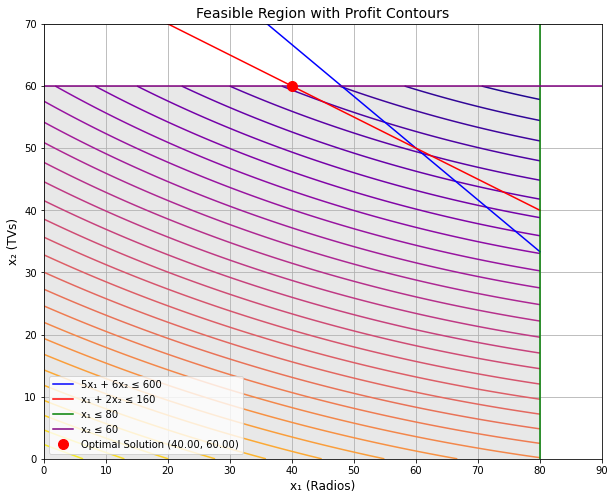

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Objective function (profit function to maximize)
def profit(x):
    x1, x2 = x
    return -(1300*x1 - 5.1*x1**2 + 3500*x2 - 10.1*x2**2)

# Constraints
constraints = [
    {'type': 'ineq', 'fun': lambda x: 80 - x[0]},         # x1 <= 80
    {'type': 'ineq', 'fun': lambda x: 60 - x[1]},         # x2 <= 60
    {'type': 'ineq', 'fun': lambda x: 600 - (5*x[0] + 6*x[1])},  # 5x1 + 6x2 <= 600 (components)
    {'type': 'ineq', 'fun': lambda x: 160 - (x[0] + 2*x[1])},    # x1 + 2x2 <= 160 (labor)
    {'type': 'ineq', 'fun': lambda x: x[0]},              # x1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]}               # x2 >= 0
]

# Initial guess for x1 and x2
x0 = [50, 50]

# Solve the problem using 'SLSQP' (Sequential Least Squares Programming)
result = minimize(profit, x0, constraints=constraints, method='SLSQP')

# Get the optimized values for x1 and x2, and the maximum profit
x_opt = result.x
max_profit = -result.fun

# Print the results
print(f"Optimal solution for radios (x1): {x_opt[0]:.2f}")
print(f"Optimal solution for TVs (x2): {x_opt[1]:.2f}")
print(f"Maximum profit: ₹{max_profit:.2f}")

# Now, let's visualize the feasible region, profit contours, and the optimal solution

# Define the constraints
x1_vals = np.linspace(0, 80, 400)
x2_vals = np.linspace(0, 60, 400)

# Create a meshgrid for x1 and x2
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Profit function for meshgrid (negated to align with minimize function)
Profit = -(1300*X1 - 5.1*X1**2 + 3500*X2 - 10.1*X2**2)

# Constraint 1: 5x1 + 6x2 <= 600 (components)
comp_constraint = (5*X1 + 6*X2 <= 600)

# Constraint 2: x1 + 2x2 <= 160 (labor)
labor_constraint = (X1 + 2*X2 <= 160)

# Feasible area (satisfying all constraints)
feasible_region = comp_constraint & labor_constraint

# Plot the constraints and profit contours
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, feasible_region, levels=[0, 1], colors=['lightgrey', 'lightgreen'], alpha=0.5)

# Profit contours
plt.contour(X1, X2, Profit, levels=30, cmap='plasma')

# Boundary lines for constraints
plt.plot(x1_vals, (600 - 5*x1_vals)/6, label="5x₁ + 6x₂ ≤ 600", color="blue")  # components
plt.plot(x1_vals, (160 - x1_vals)/2, label="x₁ + 2x₂ ≤ 160", color="red")  # labor
plt.axvline(x=80, label="x₁ ≤ 80", color="green")  # x₁ <= 80
plt.axhline(y=60, label="x₂ ≤ 60", color="purple")  # x₂ <= 60

# Labels and plot formatting
plt.xlim(0, 90)
plt.ylim(0, 70)
plt.xlabel('x₁ (Radios)', fontsize=12)
plt.ylabel('x₂ (TVs)', fontsize=12)
plt.title('Feasible Region with Profit Contours', fontsize=14)
plt.legend()

# Plot the optimal point (40, 60)
plt.plot(x_opt[0], x_opt[1], 'ro', label=f'Optimal Solution ({x_opt[0]:.2f}, {x_opt[1]:.2f})', markersize=10)
plt.legend(loc='best')

plt.grid(True)
plt.show()
